# Import libraries 

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [4]:
df=pd.read_csv("netflix_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#  Check dataset info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Check missing values

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Cleaning 

```Handle Missing Values:```

In [15]:
df=df.dropna(subset=['title','country'])
df['rating']=df['rating'].fillna("unknown")

```check duplicates:```

In [24]:
duplicate_count = df.duplicated().sum()
print(f'number of duplicate rows  { duplicate_count}')

number of duplicate rows  0


```Check Data Types:```

In [28]:
# Convert 'date_added' to datetime
df["date_added"]=pd.to_datetime(df['date_added'],errors='coerce')
# Convert 'release_year' to integer
df['release_year'] = df['release_year'].astype('Int64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7976 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7976 non-null   object        
 1   type          7976 non-null   object        
 2   title         7976 non-null   object        
 3   director      5751 non-null   object        
 4   cast          7305 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    7882 non-null   datetime64[ns]
 7   release_year  7976 non-null   Int64         
 8   rating        7976 non-null   object        
 9   duration      7973 non-null   object        
 10  listed_in     7976 non-null   object        
 11  description   7976 non-null   object        
dtypes: Int64(1), datetime64[ns](1), object(10)
memory usage: 817.9+ KB


# Exploratory Data Analysis (EDA)

In [33]:
df.describe()

,date_added,release_year
count,7882,7976.0
mean,2019-04-24 13:16:54.869322240,2013.885532
min,2008-01-01 00:00:00,1942.0
25%,2018-03-28 12:00:00,2013.0
50%,2019-06-21 00:00:00,2017.0
75%,2020-07-05 00:00:00,2019.0
max,2021-09-25 00:00:00,2021.0
std,NaN,8.957752


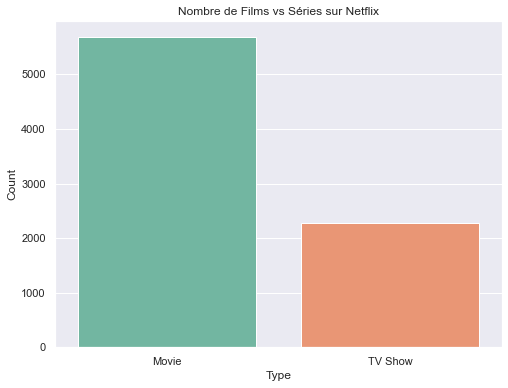

In [55]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))  # You can adjust the figure size for consistency
ax = sns.countplot(x="type", data=df, palette="Set2")
plt.title('Nombre de Films vs Séries sur Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


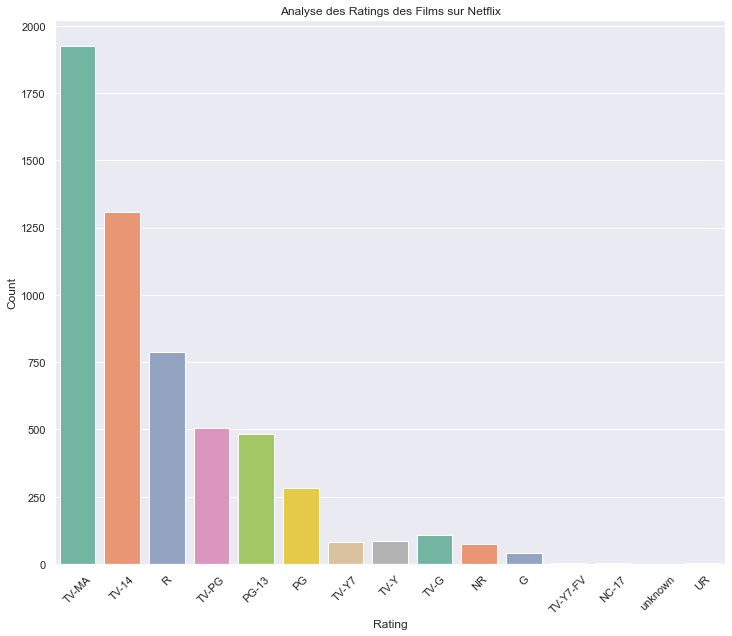

In [58]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df[df['type'] == 'Movie'], palette="Set2", order=df['rating'].value_counts().index[0:15])
plt.title('Analyse des Ratings des Films sur Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


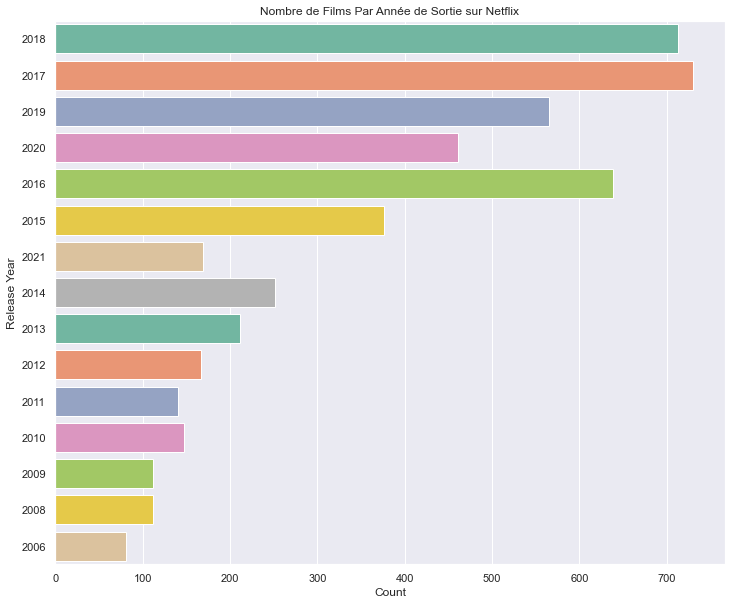

In [59]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df[df['type'] == 'Movie'], palette="Set2", order=df['release_year'].value_counts().index[0:15])
plt.title('Nombre de Films Par Année de Sortie sur Netflix')
plt.xlabel('Count')
plt.ylabel('Release Year')
plt.show()


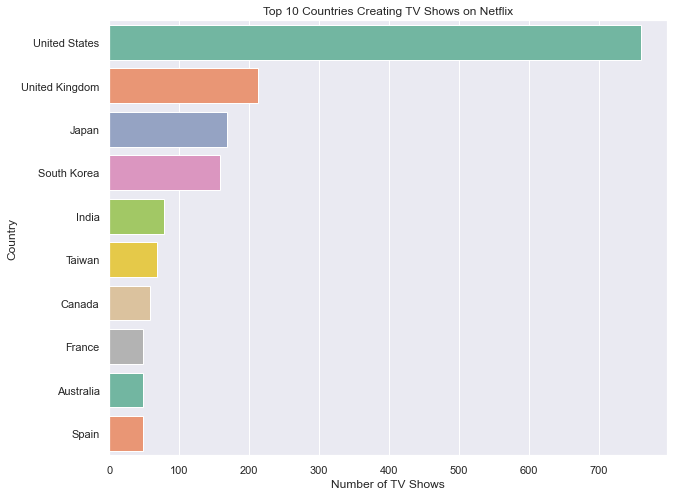

In [60]:
plt.figure(figsize=(10,8))  # Adjusting the size for better readability
sns.set(style="darkgrid")
plt.title("Top 10 Countries Creating TV Shows on Netflix")
sns.barplot(y=df[df['type'] == 'TV Show']['country'].value_counts().index[:10], 
            x=df[df['type'] == 'TV Show']['country'].value_counts().values[:10], palette="Set2")
plt.ylabel("Country")
plt.xlabel("Number of TV Shows")
plt.show()
